In [2]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("asl_alphabet.png")
image_bgr = image[:,:,::-1]
image_rgb = image[:,:,::-1]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

handCascade = cv2.CascadeClassifier('haar_models/hand.xml')
palmCascade = cv2.CascadeClassifier('haar_models/palm.xml')
closedPalmCascade = cv2.CascadeClassifier('haar_models/closed_frontal_palm.xml')
fistCascade = cv2.CascadeClassifier('haar_models/fist.xml')
randomCascade = cv2.CascadeClassifier('haar_models/Hand.Cascade.1.xml')

[INFO] Found 45 Hands!
[[ 234  212   65   65]
 [ 616   62  108  108]
 [ 372  100  102  102]
 [ 154   73   97   97]
 [1105   71  111  111]
 [ 123  121   68   68]
 [ 374  198   70   70]
 [ 851  174  117  117]
 [1614  381   88   88]
 [ 641  327   88   88]
 [1124  152   82   82]
 [1389  211   79   79]
 [ 106   97  115  115]
 [1595  116  118  118]
 [1352  131  132  132]
 [ 620  328  126  126]
 [ 664  382   71   71]
 [ 625  309  389  389]
 [1184  364  698  698]
 [ 437  471   42   42]
 [ 465  194  278  278]
 [ 971  536   74   74]
 [1523  543   66   66]
 [1024  128  270  270]
 [1732  438   63   63]
 [1397  413  115  115]
 [ 257  422   72   72]
 [1092  395  128  128]
 [1000  645  109  109]
 [ 114  615  128  128]
 [ 267  694  430  430]
 [1009  732  444  444]
 [ 377  450  125  125]
 [ 855  473  133  133]
 [1443  656  117  117]
 [ 993  596  342  342]
 [  65  545  462  462]
 [1206  736   99   99]
 [ 777  726  121  121]
 [ 903  819   68   68]
 [ 760  931  105  105]
 [ 623 1004   83   83]
 [ 889 1051

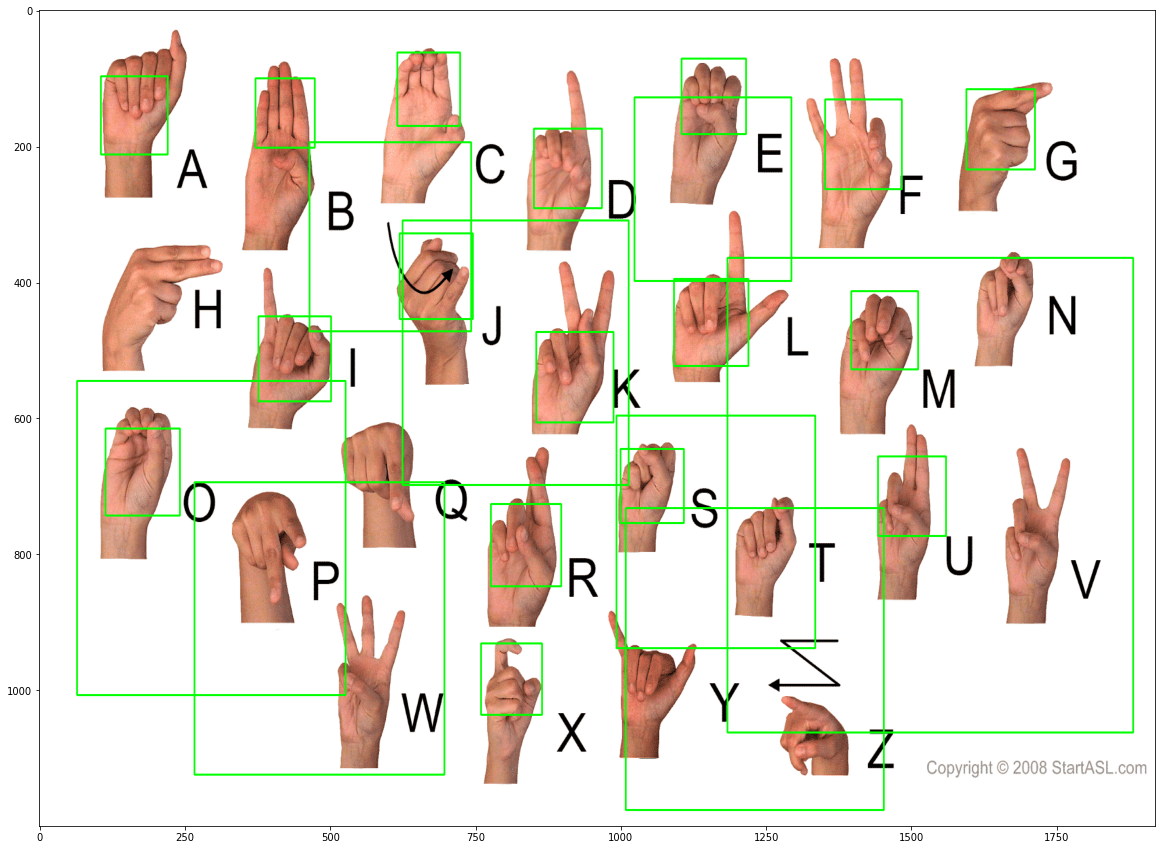

In [5]:
hands = palmCascade.detectMultiScale(image_gray, scaleFactor=1.03, minNeighbors=1, minSize=(40,40))
print("[INFO] Found {0} Hands!".format(len(hands)))
pad = 5
print(hands)

image_bgr = np.ascontiguousarray(image_rgb, dtype=np.uint8)

hands_processed = []

count = 0
for (x, y, w, h) in hands:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    if h >= 100 and w >= 100:
        cv2.rectangle(image_bgr, (x,y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imwrite('curr_frame/{num}.jpeg'.format(num=count), image_bgr[y-pad+1:y+h+pad, x-pad+1:x+w+pad])
        count += 1
        
print(count)
    
status = cv2.imwrite('hands_detected.jpg', image_bgr)

fig = plt.figure()
fig.set_size_inches(20,15)

plt.imshow(image_bgr, aspect="auto")

In [4]:
video_capture = cv2.VideoCapture(0)

pad = 10

while True:
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    hands = fistCascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=1, minSize=(40,40))
    hands_processed = []

    i = 0
    for (x, y, w, h) in hands:
        if w >= 100 and h >= 100:
            cv2.imwrite('curr_frame/{num}.jpg'.format(num=i), frame[y-pad+1:y+h+pad, x-pad+1:x+w+pad])
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            i += 1

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

2021-11-17 01:27:15.945 Python[11682:493779] Error loading /Library/CoreMediaIO/Plug-Ins/DAL/LogiCapture.plugin/Contents/MacOS/LogiCapture:  dlopen(/Library/CoreMediaIO/Plug-Ins/DAL/LogiCapture.plugin/Contents/MacOS/LogiCapture, 262): no suitable image found.  Did find:
	/Library/CoreMediaIO/Plug-Ins/DAL/LogiCapture.plugin/Contents/MacOS/LogiCapture: mach-o, but wrong architecture
	/Library/CoreMediaIO/Plug-Ins/DAL/LogiCapture.plugin/Contents/MacOS/LogiCapture: stat() failed with errno=34
